# **1. 📊 Perkenalan Dataset**

# Sumber Dataset
Dataset yang digunakan untuk proyek ini adalah Stroke Prediction Dataset, yang diperoleh dari repositori publik Kaggle.

# Tautan Sumber: https://www.kaggle.com/datasets/sailikitha0320/health-care-stroke-prediction-data

# Content Dataset
Dataset ini berisi 5110 observasi (baris) dan 12 variabel (kolom) yang mengandung informasi demografis dan medis pasien.

Berikut adalah rincian untuk setiap variabel:

1. id: Nomor ID unik untuk setiap pasien.

2. gender: Jenis kelamin pasien ("Male", "Female", atau "Other").

3. age: Usia pasien dalam tahun.

4. hypertension: Menunjukkan apakah pasien memiliki riwayat hipertensi (1 untuk ya, 0 untuk tidak).

5. heart_disease: Menunjukkan apakah pasien memiliki riwayat penyakit jantung (1 untuk ya, 0 untuk tidak).

6. ever_married: Status pernikahan pasien ("Yes" atau "No").

7. work_type: Tipe pekerjaan pasien ("children", "Govt_job", "Never_worked", "Private", atau "Self-employed").

8. Residence_type: Tipe area tempat tinggal pasien ("Rural" atau "Urban").

9. avg_glucose_level: Rata-rata kadar glukosa dalam darah pasien.

10. bmi: Body Mass Index (Indeks Massa Tubuh) pasien.

11. smoking_status: Status merokok pasien ("formerly smoked", "never smoked", "smokes", atau "Unknown").

12. stroke (Variabel Target): Ini adalah variabel target yang menunjukkan apakah pasien mengalami stroke (1) atau tidak (0).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

## **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [6]:

df = pd.read_csv('../healthcare_stroke/healthcare_stroke_prediction_data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,47356,Female,42.0,0,0,Yes,Private,Urban,87.40,24.5,formerly smoked,0
1,13236,Female,13.0,0,0,No,children,Rural,73.48,22.9,Unknown,0
2,3251,Male,54.0,0,0,Yes,Private,Urban,111.37,29.1,formerly smoked,0
3,35626,Male,81.0,0,0,Yes,Self-employed,Urban,99.33,33.7,never smoked,1
4,36706,Female,76.0,0,0,Yes,Self-employed,Urban,106.41,NaN,formerly smoked,1


# **3. Memuat Dataset**
# Exploratory Data Analysis (EDA)
Pada tahap ini, akan dilakukan Exploratory Data Analysis (EDA) untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [7]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5509 entries, 0 to 5508
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5509 non-null   int64  
 1   gender             5509 non-null   object 
 2   age                5509 non-null   float64
 3   hypertension       5509 non-null   int64  
 4   heart_disease      5509 non-null   int64  
 5   ever_married       5509 non-null   object 
 6   work_type          5509 non-null   object 
 7   Residence_type     5509 non-null   object 
 8   avg_glucose_level  5509 non-null   float64
 9   bmi                5251 non-null   float64
 10  smoking_status     5509 non-null   object 
 11  stroke             5509 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 516.6+ KB


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  258
smoking_status         0
stroke                 0
dtype: int64

# **5. Data Preprocessing**

Cek Distribusi Target

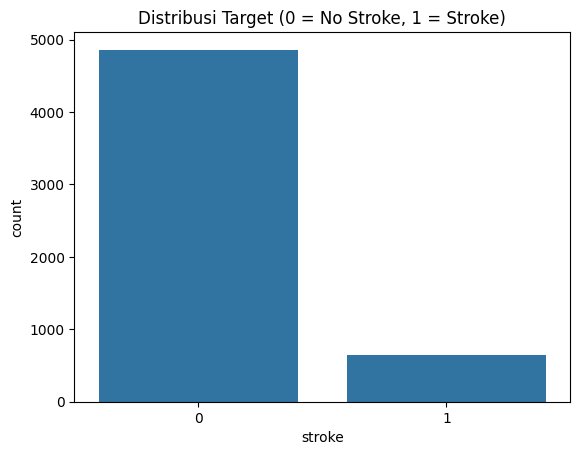

Proporsi Target (Stroke):
stroke
0    0.882374
1    0.117626
Name: proportion, dtype: float64


In [9]:
# Baris 'rename' tidak diperlukan karena nama kolom target sudah 'stroke'

# Cek distribusi target 'stroke'
sns.countplot(x='stroke', data=df)
plt.title("Distribusi Target (0 = No Stroke, 1 = Stroke)")
plt.show()

# Tampilkan proporsinya
print("Proporsi Target (Stroke):")
print(df['stroke'].value_counts(normalize=True))

**💡 Kesimpulan Analisis Distribusi Target**
Berdasarkan grafik dan data proporsi, kesimpulan analisisnya adalah:

Dataset Sangat Tidak Seimbang (Highly Imbalanced):

Kelas Mayoritas (0 - Tidak Stroke): Mendominasi dataset, mencakup sekitar 88.2% dari seluruh data (hampir 5000 entri).

Kelas Minoritas (1 - Stroke): Merupakan kasus yang jauh lebih langka, hanya mencakup sekitar 11.8% dari data.

Temuan Krusial: Ini adalah temuan penting yang akan sangat memengaruhi tahap modeling. Model yang dilatih pada data ini akan cenderung sangat baik dalam menebak "Tidak Stroke" tetapi kemungkinan besar akan sangat buruk dalam mendeteksi kasus "Stroke" yang sebenarnya.

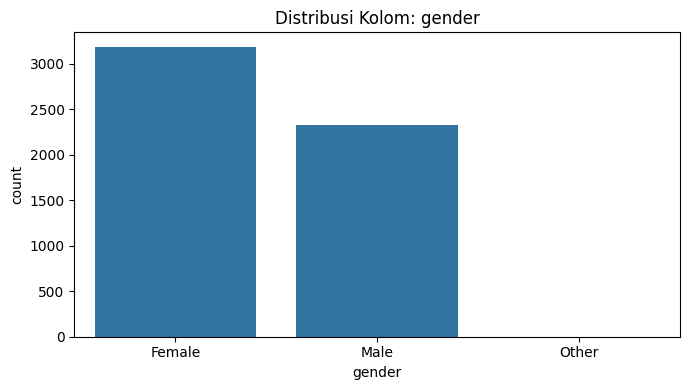

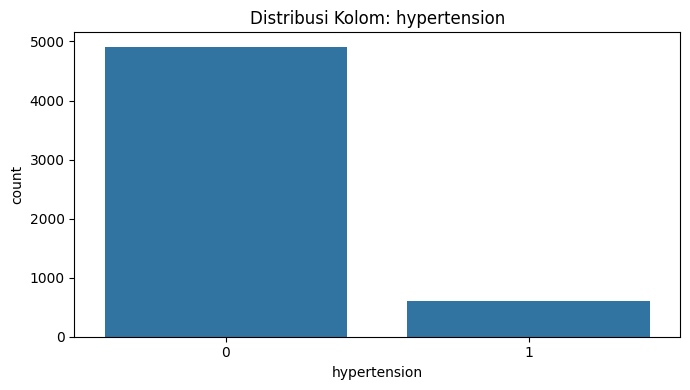

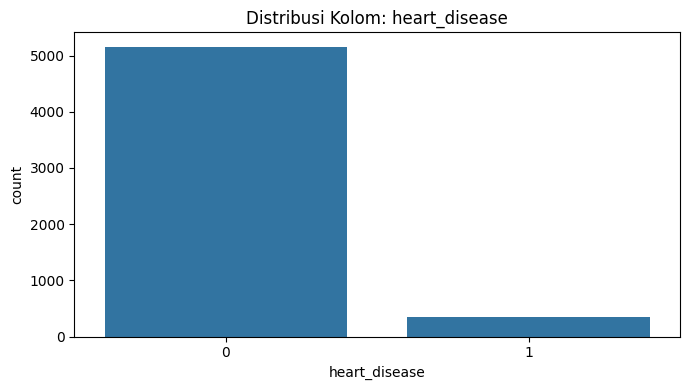

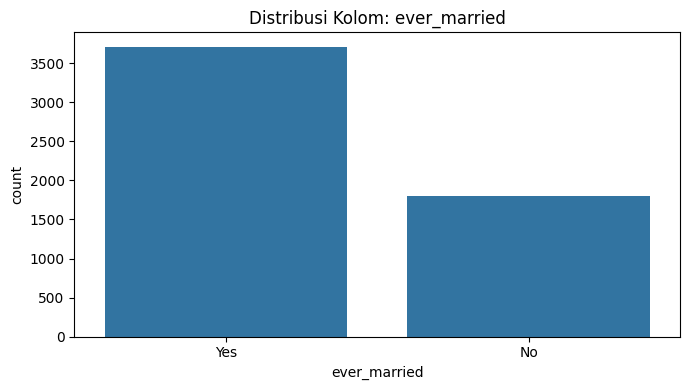

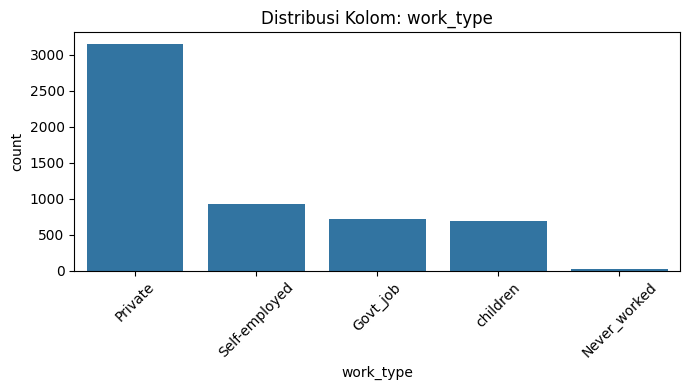

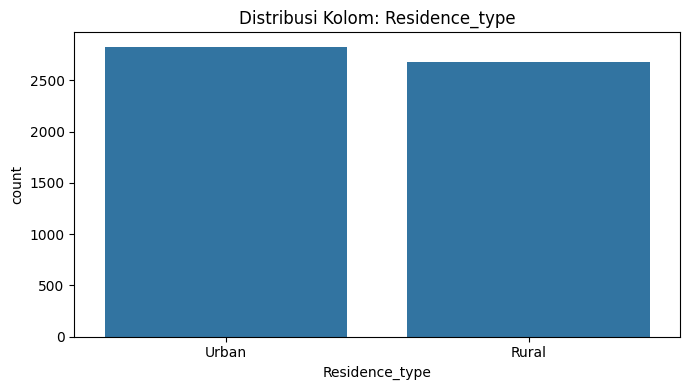

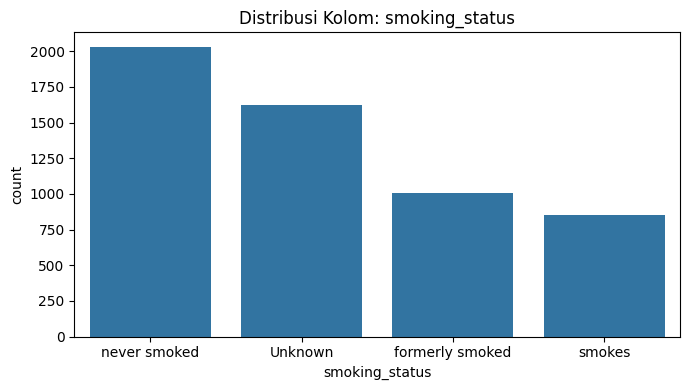

In [10]:
# Tentukan kolom kategorikal
# Termasuk kolom biner seperti hypertension dan heart_disease
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Looping untuk membuat plot setiap kolom
for col in categorical_cols:
    plt.figure(figsize=(7, 4)) # Ukuran bisa disesuaikan
    sns.countplot(x=col, data=df, order=df[col].value_counts().index) # Urutkan berdasarkan frekuensi
    plt.title(f'Distribusi Kolom: {col}')
    
    # Putar label jika terlalu panjang (seperti work_type)
    if df[col].nunique() > 4:
        plt.xticks(rotation=45)
        
    plt.tight_layout()
    plt.show()

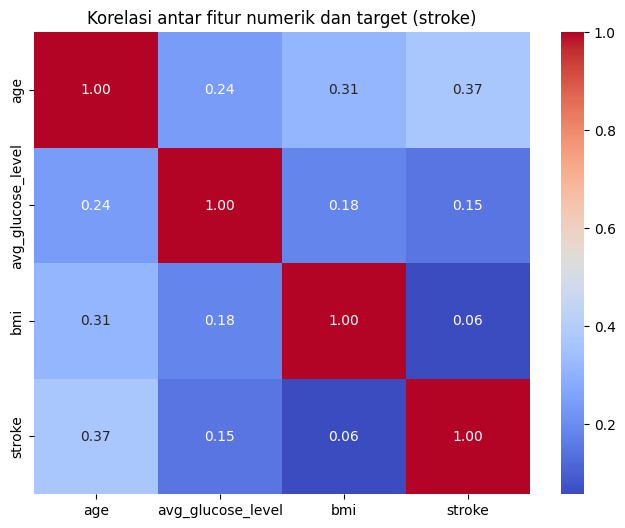

In [11]:
# Tentukan kolom numerik (yang bukan biner atau id)
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

# Buat heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[numeric_cols + ['stroke']].corr(), # Tambahkan 'stroke' untuk melihat korelasi dgn target
    annot=True,     # Tampilkan angka korelasi
    cmap='coolwarm',  # Gunakan palet warna coolwarm
    fmt='.2f'         # Format angka menjadi 2 desimal
)
plt.title("Korelasi antar fitur numerik dan target (stroke)")
plt.show()

**📊 Wawasan dari Heatmap Korelasi**
Berdasarkan heatmap korelasi, berikut adalah insight utama yang didapat:

age (Usia) adalah Faktor Terkuat

Kolom age memiliki korelasi positif sedang (0.37) dengan stroke, nilai tertinggi di antara fitur numerik lainnya.

Insight: Semakin tua usia seseorang, semakin tinggi kemungkinannya untuk mengalami stroke. Ini menjadikan age sebagai fitur numerik prediktor yang paling penting.

avg_glucose_level (Kadar Glukosa) Berpengaruh Kecil

Kolom ini memiliki korelasi positif lemah (0.15) dengan stroke.

Insight: Ada sedikit kecenderungan bahwa kadar glukosa yang lebih tinggi berhubungan dengan risiko stroke, namun hubungannya tidak kuat.

bmi (Indeks Massa Tubuh) Hampir Tidak Berpengaruh

Kolom bmi memiliki korelasi sangat lemah (0.06), yang sangat dekat dengan nol.

Insight: Berdasarkan data ini, tampaknya tidak ada hubungan linear yang jelas antara BMI dan risiko stroke.

Tidak Ada Korelasi Kuat Antar Fitur (Multikolinearitas Rendah)

Korelasi antar fitur independen (misalnya, age vs bmi (0.31)) semuanya tergolong lemah.

Insight: Ini adalah hal yang baik. Ini menunjukkan bahwa tidak ada masalah multicollinearity (fitur yang saling tumpang tindih) yang signifikan di antara fitur-fitur numerik.

**⚙️ 5. Data Preprocessing**
Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang akan dilakukan:

Menangani Missing Values (data kosong) dan data duplikat

Normalisasi fitur numerik

Deteksi dan Penanganan Outlier

Encoding Data Kategorikal

Drop kolom yang tidak diperlukan

Memisahkan fitur dan label

In [12]:
# Buat salinan dataframe untuk preprocessing
df_clean = df.copy()

In [13]:
# --- A. Menangani Missing Values ---

print("Missing values SEBELUM handling:")
print(df_clean.isnull().sum())
print(f"\nNilai 'smoking_status' unik: {df_clean['smoking_status'].unique()}")

# 1. Imputasi 'bmi' dengan median (karena median lebih tahan outlier)
bmi_median = df_clean['bmi'].median()
df_clean['bmi'].fillna(bmi_median, inplace=True)
print(f"\nMissing 'bmi' telah diisi dengan median: {bmi_median}")

# 2. Tangani 'Unknown' di 'smoking_status' (ganti dengan modus/nilai terbanyak)
smoking_mode = df_clean['smoking_status'].mode()[0]
df_clean['smoking_status'] = df_clean['smoking_status'].replace('Unknown', smoking_mode)
print(f"Nilai 'Unknown' di smoking_status diganti dengan modus: {smoking_mode}")

print("\nMissing values SETELAH handling:")
print(df_clean.isnull().sum())


# --- B. Menangani Data Duplikat ---
print(f"\nJumlah baris sebelum drop duplikat: {len(df_clean)}")
df_clean.drop_duplicates(inplace=True)
print(f"Jumlah baris setelah drop duplikat: {len(df_clean)}")


# --- C. Menangani Data Anomali (Opsional, tapi direkomendasikan) ---
print(f"\nJumlah baris sebelum membuang gender 'Other': {len(df_clean)}")
# Membuang baris dengan 'gender' = 'Other' karena hanya ada 1
df_clean = df_clean[df_clean['gender'] != 'Other']
print(f"Jumlah baris setelah membuang gender 'Other': {len(df_clean)}")

Missing values SEBELUM handling:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  258
smoking_status         0
stroke                 0
dtype: int64

Nilai 'smoking_status' unik: ['formerly smoked' 'Unknown' 'never smoked' 'smokes']

Missing 'bmi' telah diisi dengan median: 28.2
Nilai 'Unknown' di smoking_status diganti dengan modus: never smoked

Missing values SETELAH handling:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Jumlah baris sebelum drop duplikat: 5509
Jumlah baris setelah drop duplikat: 5100

Jumlah baris sebelum membuang gender 'Other': 5

C:\Users\surya\AppData\Local\Temp\ipykernel_33992\3890347355.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['bmi'].fillna(bmi_median, inplace=True)


In [14]:
from sklearn.preprocessing import StandardScaler

# Tentukan kolom numerik
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

# Inisialisasi Scaler
scaler = StandardScaler()

# Fit dan transform kolom numerik
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

print("\nData setelah scaling (5 baris pertama):")
print(df_clean[numeric_cols].head())


Data setelah scaling (5 baris pertama):
        age  avg_glucose_level       bmi
0 -0.052512          -0.413424 -0.566799
1 -1.335985          -0.721304 -0.774472
2  0.478580           0.116741  0.030261
3  1.673538          -0.149558  0.627321
4  1.452249           0.007036 -0.086555


In [15]:
from scipy.stats import zscore

# Cek jumlah baris sebelum handling outlier
print(f"\nJumlah baris sebelum handling outlier: {len(df_clean)}")

# Hitung z-scores untuk kolom numerik
# Kita gunakan nilai absolut (.abs)
z_scores = np.abs(zscore(df_clean[numeric_cols]))

# Simpan hanya baris di mana SEMUA z-score < 3
df_clean = df_clean[(z_scores < 3).all(axis=1)]

print(f"Jumlah baris setelah handling outlier (Z-score < 3): {len(df_clean)}")


Jumlah baris sebelum handling outlier: 5099
Jumlah baris setelah handling outlier (Z-score < 3): 4992


In [16]:
# --- A. Label Encoding (Manual Map) ---
df_clean['gender'] = df_clean['gender'].map({'Male': 1, 'Female': 0})
df_clean['ever_married'] = df_clean['ever_married'].map({'Yes': 1, 'No': 0})
df_clean['Residence_type'] = df_clean['Residence_type'].map({'Urban': 1, 'Rural': 0})

print("\nData setelah Label Encoding (Binary):")
print(df_clean[['gender', 'ever_married', 'Residence_type']].head())

# --- B. One-Hot Encoding (pd.get_dummies) ---
df_clean = pd.get_dummies(df_clean, columns=['work_type', 'smoking_status'], drop_first=True)

print("\nData setelah One-Hot Encoding (5 baris pertama):")
print(df_clean.head())


Data setelah Label Encoding (Binary):
   gender  ever_married  Residence_type
0       0             1               1
1       0             0               0
2       1             1               1
3       1             1               1
4       0             1               1

Data setelah One-Hot Encoding (5 baris pertama):
      id  gender       age  hypertension  heart_disease  ever_married  \
0  47356       0 -0.052512             0              0             1   
1  13236       0 -1.335985             0              0             0   
2   3251       1  0.478580             0              0             1   
3  35626       1  1.673538             0              0             1   
4  36706       0  1.452249             0              0             1   

   Residence_type  avg_glucose_level       bmi  stroke  \
0               1          -0.413424 -0.566799       0   
1               0          -0.721304 -0.774472       0   
2               1           0.116741  0.030261       0   


In [17]:
# Drop kolom 'id'
df_clean.drop(columns=['id'], inplace=True)

print("\nData final setelah drop kolom 'id':")
df_clean.info()


Data final setelah drop kolom 'id':
<class 'pandas.core.frame.DataFrame'>
Index: 4992 entries, 0 to 5508
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       4992 non-null   int64  
 1   age                          4992 non-null   float64
 2   hypertension                 4992 non-null   int64  
 3   heart_disease                4992 non-null   int64  
 4   ever_married                 4992 non-null   int64  
 5   Residence_type               4992 non-null   int64  
 6   avg_glucose_level            4992 non-null   float64
 7   bmi                          4992 non-null   float64
 8   stroke                       4992 non-null   int64  
 9   work_type_Never_worked       4992 non-null   bool   
 10  work_type_Private            4992 non-null   bool   
 11  work_type_Self-employed      4992 non-null   bool   
 12  work_type_children           4992 non-null  

In [23]:
import os  # <-- Tambahkan import ini di awal sel Anda

# Tentukan path output
OUTPUT_PATH = 'Membangun_model/namadataset_preprocessing/data_bersih.csv'

# --- TAMBAHKAN KODE INI ---
# Ambil nama direktorinya saja (semua sebelum nama file)
output_dir = os.path.dirname(OUTPUT_PATH)

# Buat folder/direktori jika belum ada
os.makedirs(output_dir, exist_ok=True)
# -------------------------

# Simpan ke CSV
# index=False agar tidak menyimpan nomor baris sebagai kolom baru
df_clean.to_csv(OUTPUT_PATH, index=False)

print(f"\nDataset bersih telah disimpan di: {OUTPUT_PATH}")


Dataset bersih telah disimpan di: Membangun_model/namadataset_preprocessing/data_bersih.csv


In [24]:
from sklearn.preprocessing import StandardScaler

# 1. Tentukan kolom numerik yang akan di-scale
# Ini adalah kolom-kolom yang memiliki rentang nilai bervariasi
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

# 2. Inisialisasi StandardScaler
scaler = StandardScaler()

# 3. Fit (pelajari) dan transform (terapkan) scaling pada kolom numerik
# Ini akan mengganti nilai asli dengan nilai yang sudah di-scale
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

# 4. Verifikasi hasil
# Kita cek statistik deskriptifnya. 
# Perhatikan: 'mean' (rata-rata) akan sangat mendekati 0
# dan 'std' (standar deviasi) akan mendekati 1.
print("Statistik Deskriptif SETELAH Scaling:")
print(df_clean[numeric_cols].describe())

# Tampilkan 5 baris pertama untuk melihat datanya
print("\nContoh data setelah di-scale:")
print(df_clean.head())

Statistik Deskriptif SETELAH Scaling:
                age  avg_glucose_level           bmi
count  4.992000e+03       4.992000e+03  4.992000e+03
mean   2.277381e-17       9.251859e-18 -1.494531e-17
std    1.000100e+00       1.000100e+00  1.000100e+00
min   -1.892761e+00      -1.152434e+00 -2.598812e+00
25%   -7.925269e-01      -6.399999e-01 -6.992306e-01
50%    4.633517e-02      -3.016639e-01 -4.223256e-02
75%    7.968960e-01       1.972345e-01  5.862003e-01
max    1.724059e+00       3.182282e+00  3.342735e+00

Contoh data setelah di-scale:
   gender       age  hypertension  heart_disease  ever_married  \
0       0 -0.041966             0              0             1   
1       0 -1.322335             0              0             0   
2       1  0.487842             0              0             1   
3       1  1.679909             0              0             1   
4       0  1.459156             0              0             1   

   Residence_type  avg_glucose_level       bmi  stroke  \